# Load the dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 
from keras import layers 

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 데이터셋 불러오기
boston = fetch_openml(name='boston')

# 독립 변수와 종속 변수 나누기
X = boston.data
y = boston.target

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
result = pd.concat([X, y], axis=1)
result.shape

(506, 14)

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325673,68.799713,3.765874,9.437853,407.042358,18.277966,359.701813,12.421130
std,8.315830,22.608456,6.938651,0.261237,0.116792,0.719211,27.665359,2.126032,8.639971,166.522232,2.256792,86.924774,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782501,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.349998,3.107300,5.000000,330.000000,18.600000,391.600006,10.925000
75%,3.281687,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200001,396.172493,16.224999
max,88.976196,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float32
 1   ZN       354 non-null    float32
 2   INDUS    354 non-null    float32
 3   CHAS     354 non-null    float32
 4   NOX      354 non-null    float32
 5   RM       354 non-null    float32
 6   AGE      354 non-null    float32
 7   DIS      354 non-null    float32
 8   RAD      354 non-null    float32
 9   TAX      354 non-null    float32
 10  PTRATIO  354 non-null    float32
 11  B        354 non-null    float32
 12  LSTAT    354 non-null    float32
dtypes: float32(13)
memory usage: 20.7 KB


In [ ]:
X_train.shape

(354, 13)

In [ ]:
y_train.shape

(354,)

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

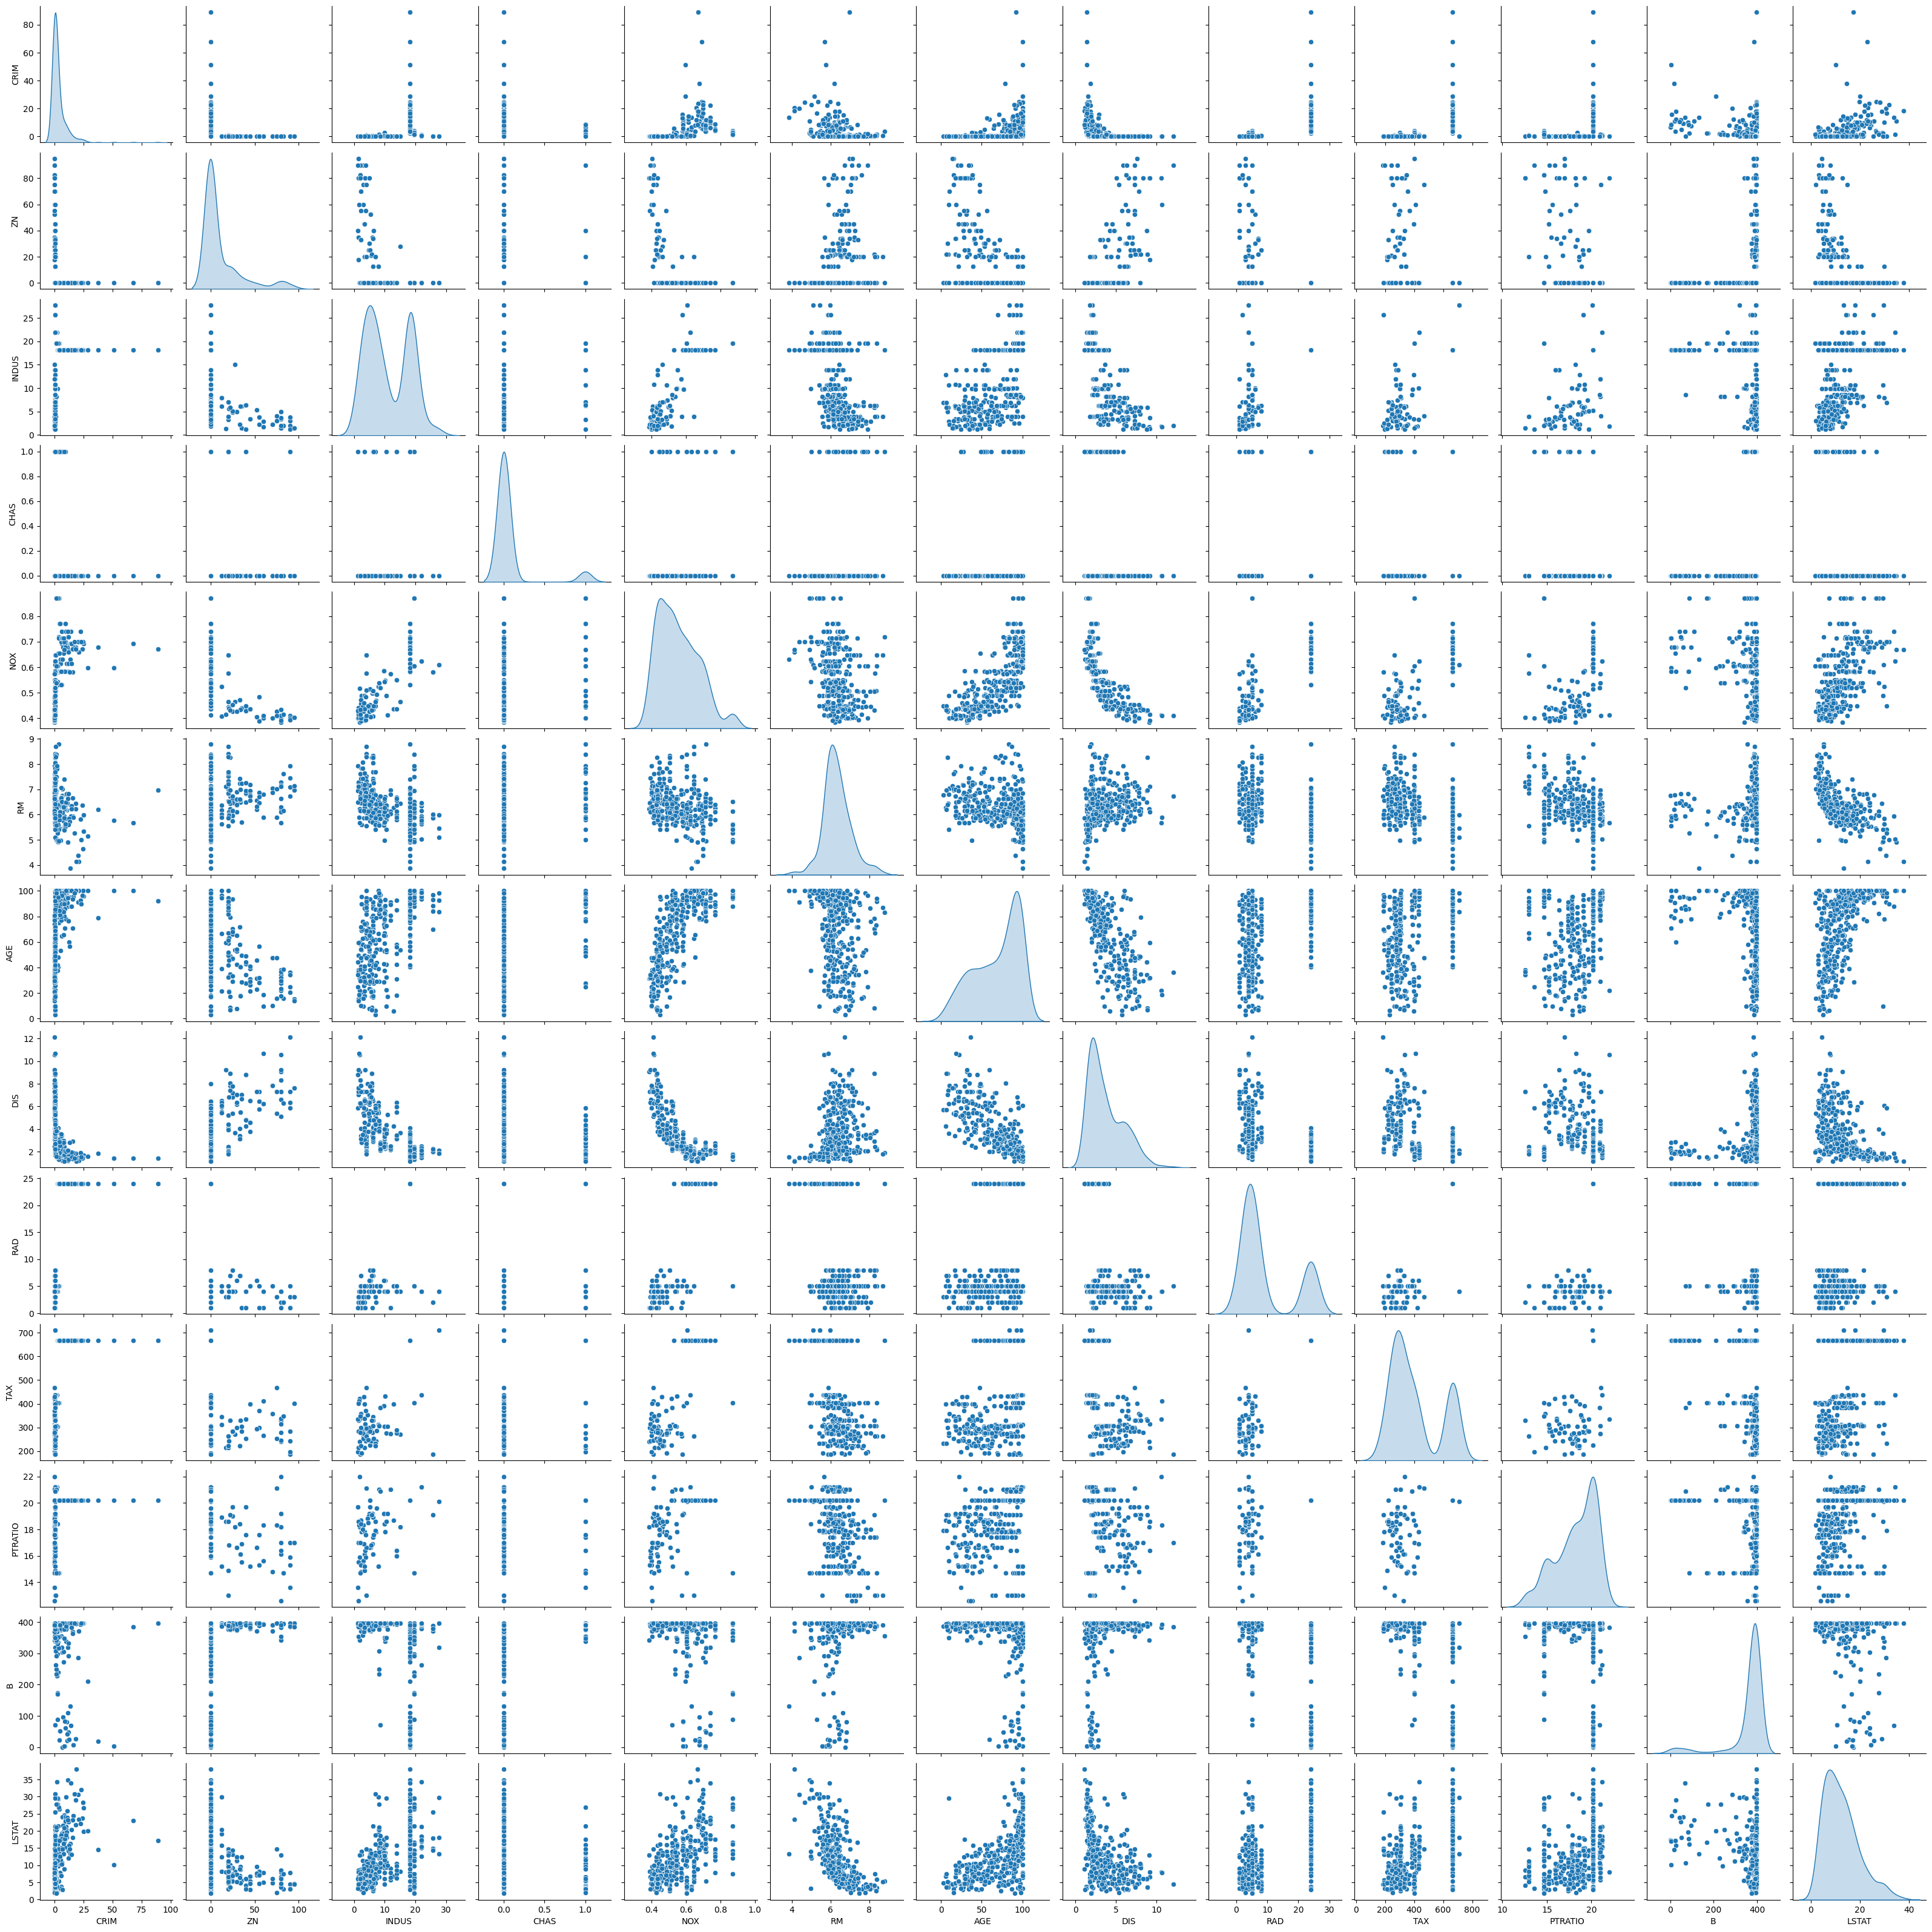

In [ ]:
# 데이터 시각화를 통한 변수간 관계 파악
# sns.pairplot(X_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
#        'PTRATIO', 'B', 'LSTAT']], diag_kind='kde')

# Build the model

In [ ]:
# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


In [ ]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300)

Epoch 1/300
9/9 [==============================] - 1s 27ms/step - loss: 600.2604 - val_loss: 546.0455
Epoch 2/300
9/9 [==============================] - 0s 9ms/step - loss: 564.8718 - val_loss: 511.8333
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 525.7227 - val_loss: 469.9783
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 476.0676 - val_loss: 416.2877
Epoch 5/300
9/9 [==============================] - 0s 9ms/step - loss: 411.0846 - val_loss: 348.6561
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 332.6122 - val_loss: 271.0122
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 248.1094 - val_loss: 193.1263
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 173.7106 - val_loss: 127.7632
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 118.8138 - val_loss: 86.8774
Epoch 10/300
9/9 [==============================] - 0s 9ms/step - loss: 88.8107 - val_loss

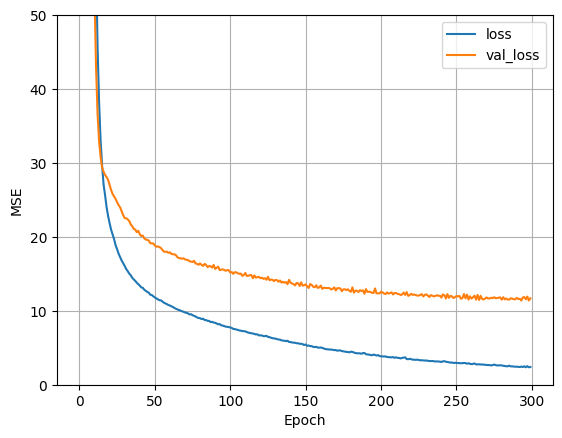

In [ ]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [ ]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 11.5922


5/5 [==============================] - 0s 2ms/step


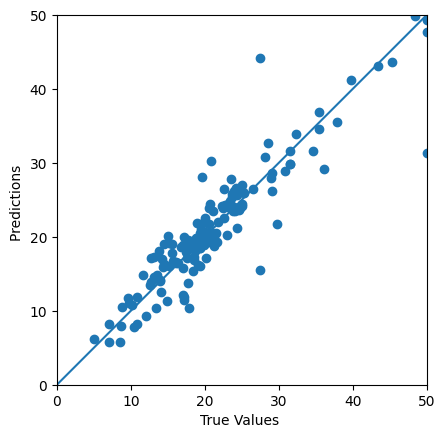

In [ ]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)